In [1]:
from IPython.display import Image

In [2]:
%matplotlib inline

# [Bias-Variance Tradeoff (Dilemma)](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

- [Introduction to Machine Learning by Pascal Vincent @ DLSS 2015](http://www.iro.umontreal.ca/~vincentp/Presentations/2015_august_DLSummerSchool_intro_to_ML_by_Pascal_Vincent.pdf) -- Bias-variance tradeoffの良い説明

汎化誤差は３つの項に分解できる

教師あり学習には必ず現れる

- Bias
    -「学習アルゴリズムの間違った前提」に起因するエラー
    - バイアスが高いアルゴリズムは入力と出力の関係性を表現できないことが多い（underfitting）
- Variance
    - トレーニングデータのわずかな変化に対する感度に起因するエラー
    - 高い分散はoverfittingの原因になる。
- Noise
    - 問題に含まれるエラー自体

$\begin{align}
E \left[ \left( y - \hat{f}(x) \right)^{2} \right] 
&= 
Bias \left[ \hat{f}(x) \right]^{2} + Var \left[ \hat{f}(x) \right] + \sigma^{2} 
\\
Bias \left[ \hat{f}(x) \right]^{2}
&=
E \left[ \hat{f}(x) \right]  - f(x)
\\
Var \left[ \hat{f}(x) \right]
&=
E \left[ \left( \hat{f}(x) - E \left[ \hat{f}(x) \right] \right)^{2} \right] 
\end{align}
$


- 簡単なモデル（キャパシティ小）：bias大、vairance小
- 複雑なモデル（キャパシティ大）：bias小、variance大




In [3]:
url = "http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png"
Image(url=url)

上の図の、左側がUnderfitting、右側がOverfitting

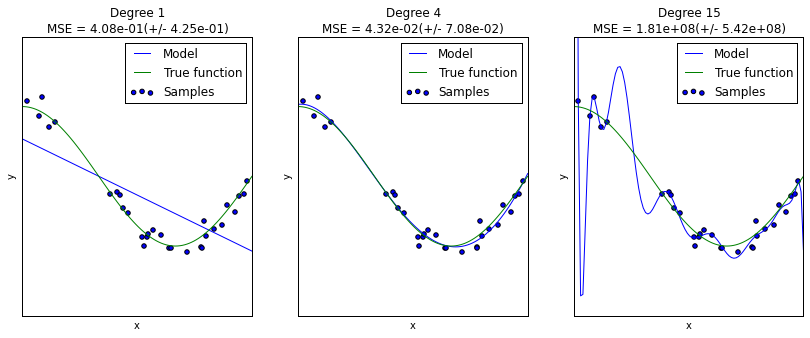

In [4]:
# Original: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## [Validation curve](http://scikit-learn.org/stable/modules/learning_curve.html#validation-curve)

[`sklearn.learning_curve.validation_curve(estimator, X, y, param_name, param_range, cv=None, scoring=None, n_jobs=1, pre_dispatch='all', verbose=0)`](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.validation_curve.html#sklearn.learning_curve.validation_curve)

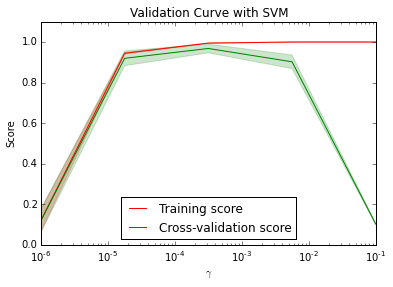

In [5]:
# Original: http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()